### *Problem Statement* : Predict the probability of Heart Disease in patients based on various observed medical                                                  conditions.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
df = pd.read_csv("D:\\Downloads\\archive (1)\\Heart_Disease_Prediction.csv")
df.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

In [71]:
df.tail()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST  \
265     162                0            0.5            1   
266     173                0            0.0            1   
267     153                0            1.3            2   
268     148                0            0.4            2   
269     108                1            1.5            2   

     Number of vessels fluro  Thallium Heart Disease  
265                        0         7       Absence  
266                        0         7       Absence  
267                        0         3       Absence  
268                        0         6       Absence  
269                        3         3      Presence

In [72]:
print("Number of rows = ",df.shape[0])
print("Number of columns = ",df.shape[1])

Number of rows =  270
Number of columns =  14


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [74]:
df.describe().T

count        mean        std    min    25%    50%  \
Age                      270.0   54.433333   9.109067   29.0   48.0   55.0   
Sex                      270.0    0.677778   0.468195    0.0    0.0    1.0   
Chest pain type          270.0    3.174074   0.950090    1.0    3.0    3.0   
BP                       270.0  131.344444  17.861608   94.0  120.0  130.0   
Cholesterol              270.0  249.659259  51.686237  126.0  213.0  245.0   
FBS over 120             270.0    0.148148   0.355906    0.0    0.0    0.0   
EKG results              270.0    1.022222   0.997891    0.0    0.0    2.0   
Max HR                   270.0  149.677778  23.165717   71.0  133.0  153.5   
Exercise angina          270.0    0.329630   0.470952    0.0    0.0    0.0   
ST depression            270.0    1.050000   1.145210    0.0    0.0    0.8   
Slope of ST              270.0    1.585185   0.614390    1.0    1.0    2.0   
Number of vessels fluro  270.0    0.670370   0.943896    0.0    0.0    0.0   
Thallium                 270.0    4.696296   1.940659    3.0    3.0    3.0   

                           75%    max  
Age                       61.0   77.0  
Sex                        1.0    1.0  
Chest pain type            4.0    4.0  
BP                       140.0  200.0  
Cholesterol              280.0  564.0  
FBS over 120               0.0    1.0  
EKG results                2.0    2.0  
Max HR                   166.0  202.0  
Exercise angina            1.0    1.0  
ST depression              1.6    6.2  
Slope of ST                2.0    3.0  
Number of vessels fluro    1.0    3.0  
Thallium                   7.0    7.0

### Univariate Analysis

##### * When dealing with a set of data, usually the first thing is to get a sense of how the variables are distributed
##### * We start by identifying a few variables of interest and checking their distribution

In [75]:
import warnings
warnings.filterwarnings("ignore")

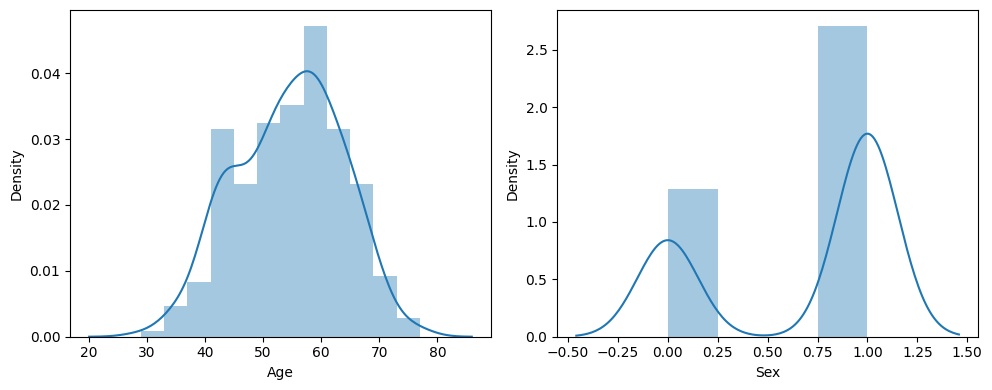

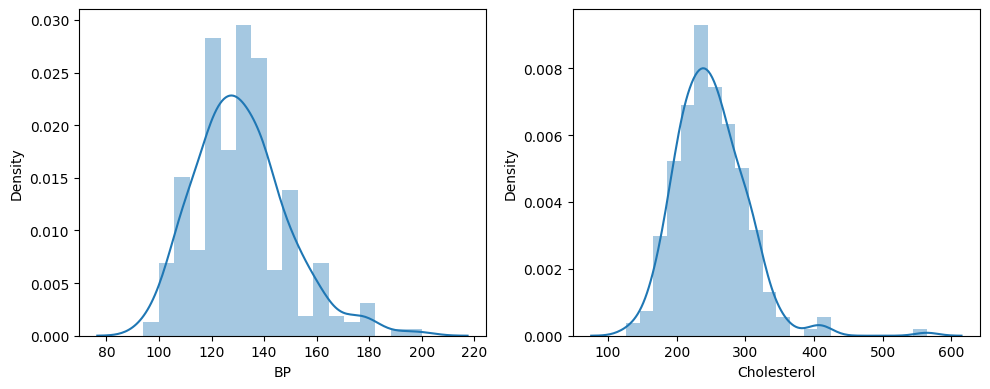

In [76]:
import seaborn as sns
num_cols = ['Age', 'Sex', 'BP', 'Cholesterol']
for i in range(0,len(num_cols),2):
 plt.figure(figsize=(10,4))
 plt.subplot(121)
 sns.distplot(df[num_cols[i]], kde=True)
 plt.subplot(122) 
 sns.distplot(df[num_cols[i+1]], kde=True)
 plt.tight_layout()
 plt.show()


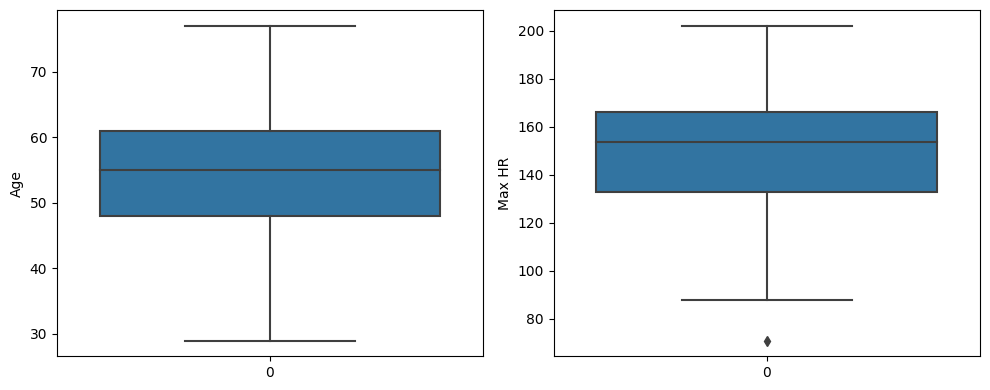

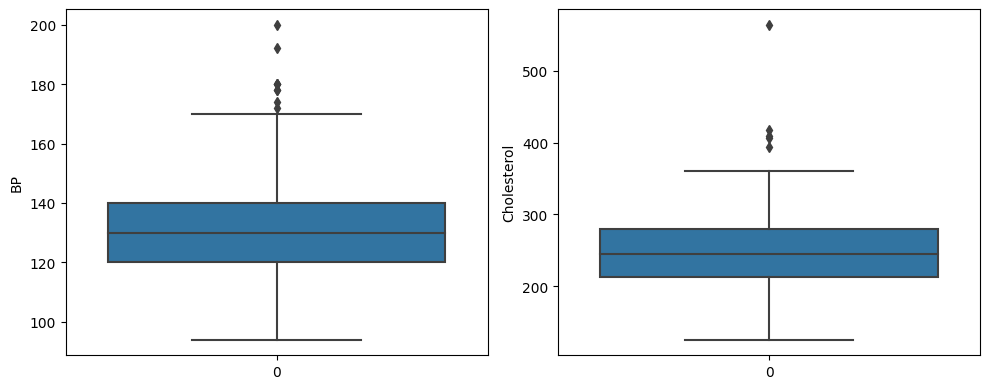

In [77]:

num_cols = ['Age', 'Max HR', 'BP', 'Cholesterol']
names = ['Age','Max HR', 'BP', 'Cholesterol']
facet = None
for i in range(0,len(num_cols),2):
 plt.figure(figsize=(10,4))
 plt.subplot(121)
 sns.boxplot(df[num_cols[i]])
 plt.ylabel(names[i])
 plt.subplot(122) 
 sns.boxplot(df[num_cols[i+1]])
 plt.ylabel(names[i+1])
 plt.tight_layout()
 plt.show()


#### Observation : 
#### 1. Most people have age in range of 50 and 60
#### 2.There are quite a very few outliers in the BP and Cholestrol 
#### 3. Most people have BP in range of 120 and 140

<Axes: xlabel='Heart Disease', ylabel='count'>

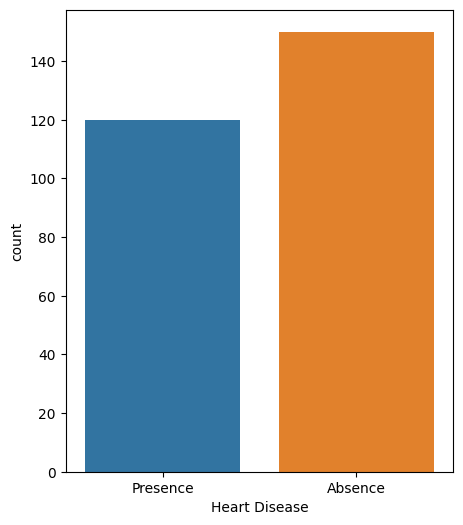

In [78]:
plt.figure(figsize=(5,6))
sns.countplot(x='Heart Disease', data=df)


<Axes: xlabel='Heart Disease', ylabel='Age'>

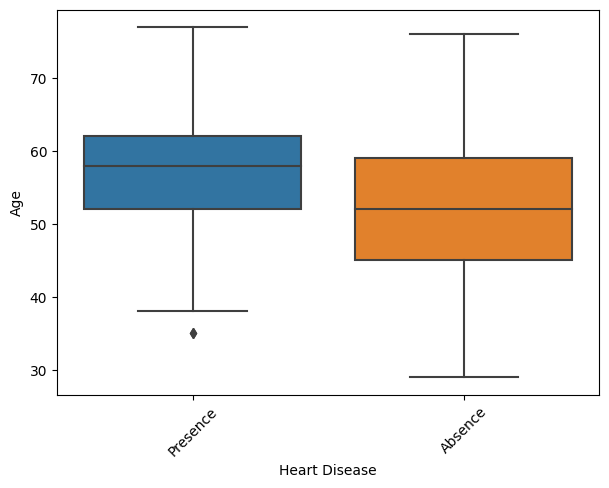

In [79]:

plt.figure(figsize=(7,5))
plt.xticks(rotation = 45)
sns.boxplot(y ='Age', x='Heart Disease', data = df)


#### |^ Observation : we see that persons who are above 50 years have heart disease

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])
df['Heart Disease'].value_counts()

0    150
1    120
Name: Heart Disease, dtype: int64

In [81]:
y = df['Heart Disease']
X = df.drop('Heart Disease',axis  =1)

In [85]:
X.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  
0                        3         3  
1                        0         7  
2                        0         7  
3                        1         7  
4                        1         3

In [95]:


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [96]:
print(X_train.shape)
print(y_train.shape)


(216, 13)
(216,)


In [97]:
print(X_test.shape)
print(y_test.shape)

(54, 13)
(54,)


## Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [99]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [100]:
y_predict = lr_model.predict(X_test)
y_predict

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [101]:
from sklearn.metrics import accuracy_score
print("Accuracy = ", accuracy_score(y_test,y_predict)*100)

Accuracy =  83.33333333333334


In [103]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_predict)
sns.heatmap(cf,cmap ='Blues',fmt='g',annot= True)

<Axes: >

### KNeighborsClassifier - KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn_model =  KNeighborsClassifier(n_neighbors = 2)

In [107]:
knn_model.fit(X_train,y_train)
y_predict = knn_model.predict(X_test)
y_predict

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [109]:
print("Accuracy of KNN = ",accuracy_score(y_test,y_predict)*100,"%")

Accuracy of KNN =  64.81481481481481 %


<Axes: >

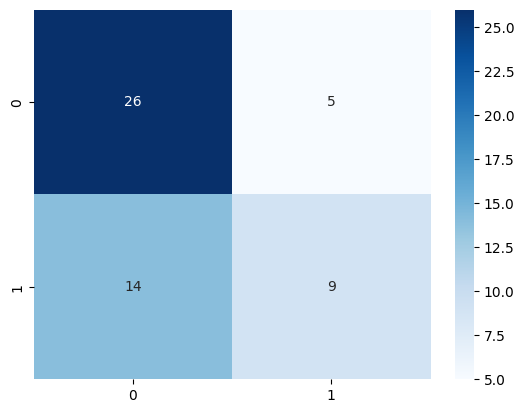

In [111]:
cf = confusion_matrix(y_test,y_predict)
sns.heatmap(cf,cmap = 'Blues',annot =True)

### GaussianNB

In [112]:
from sklearn.naive_bayes import GaussianNB

In [113]:
nb_model = GaussianNB()

In [114]:
nb_model.fit(X_train,y_train)
y_predict = nb_model.predict(X_test)
y_predict

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [115]:
print("Accuracy = ",accuracy_score(y_test,y_predict)*100)

Accuracy =  87.03703703703704


<Axes: >

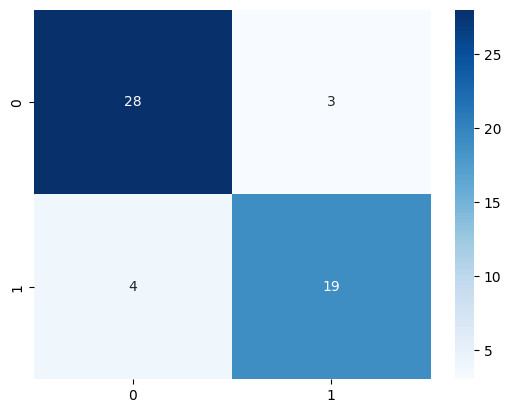

In [116]:
cf = confusion_matrix(y_test,y_predict)
sns.heatmap(cf,cmap = 'Blues',annot =True)

### SupportVectorMachine(SVM)

In [119]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear',C=1)

In [120]:
svm_model.fit(X_train,y_train)
y_predict = svm_model.predict(X_test)
y_predict

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [121]:
print("Accuracy =",accuracy_score(y_test,y_predict)*100)

Accuracy = 85.18518518518519


Text(0.5, 1.0, 'Confusion matrix for SVM')

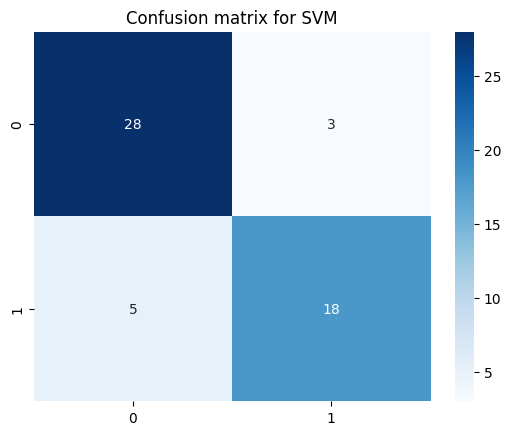

In [123]:
cf = confusion_matrix(y_test,y_predict)
sns.heatmap(cf,cmap = 'Blues',annot =True)
plt.title("Confusion matrix for SVM")

In [126]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [127]:
y_predict = classifier.predict(X_test)
y_predict

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [128]:
print("Accuracy = ",accuracy_score(y_test,y_predict)*100)

Accuracy =  72.22222222222221
